## Import the basic packages

In [1]:
import os #This module provides a portable way of using operating system dependent functionality
import pandas as pd # Basic library to handle dataframe
import numpy as np # The fundamental package for scientific computing 
import matplotlib.pyplot as plt # a comprehensive library for creating data visualizations
from scipy import interpolate
import time # This module provides various time-related functions, 
            # e.g. help you count the model running time

## Scikit-learn (sklearn) package is the most important package for machine learning in Python

In [35]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score,r2_score

### Load training dataset (for regression question)

In [6]:
# Make sure you are in the main folder('..\Machine_learning_workshop')
cd = os.getcwd()
print(cd)
while cd.split('\\')[-1]!='Machine_learning_workshop':
    os.chdir('..')
    cd=os.getcwd()
df=pd.read_csv('Regression dataset.csv',sep='\t',parse_dates=['Date'])

C:\Users\shuli278\Documents\D\PDF_Uppsala\7-Python code of ML algorithm\GitHub\Machine_learning_workshop


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5999 non-null   datetime64[ns]
 1   SST       5999 non-null   float64       
 2   U         5999 non-null   float64       
 3   AirT      5999 non-null   float64       
 4   Humidity  5999 non-null   float64       
 5   CC        5999 non-null   float64       
 6   Prec      5999 non-null   float64       
 7   SWR       5999 non-null   float64       
 8   inflow    5999 non-null   float64       
 9   thermD    5999 non-null   float64       
 10  MLD       5999 non-null   float64       
 11  W         5999 non-null   float64       
 12  Chl       1572 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 609.4 KB
How many variables to plot?3
Variable 1:SST
Variable 2:SWR
Variable 3:Chl


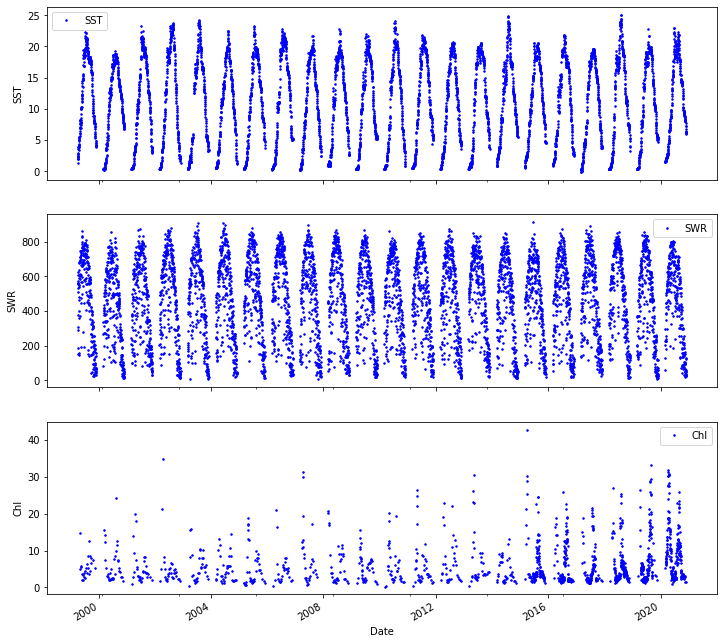

In [10]:
## Browse your dataset and create basic data visualizations
df.info()
n_var=int(input('How many variables to plot?'))
f,ax=plt.subplots(nrows=n_var,ncols=1,figsize=(12,4*n_var),sharex=True)
for i in range(n_var):
    var=input('Variable '+str(i+1)+':')
    df.plot(x='Date',y=var,ax=ax[i],style='bo',markersize=1.5)
    ax[i].set_ylabel(var)

#### Since the Chl concentration was collected weekly, there are many nan values within Chl column

## Start to build your RF regressor

In [14]:
# Choose the features and target, and make sure they are in the same length
X=df.dropna()[['SST', 'U', 'AirT', 'Humidity', 'CC', 'Prec', 'SWR', 'inflow',
       'thermD', 'MLD', 'W']]
y=df.dropna()[['Chl']].values
print('Shape of feature dataframe: {}'.format(X.shape))
print('Length of target column {}'.format(len(y)))

Shape of feature dataframe: (1572, 11)
Length of target column 1572


In [18]:
# Split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Shape of training dataset: {}'.format(X_train.shape))
print('Shape of testing dataset: {}'.format(X_test.shape))

Shape of training dataset: (1053, 11)
Shape of testing dataset: (519, 11)


In [42]:
# Build the model with default setting
RF_model=RandomForestRegressor() # Stay with the default values for now
RF_model.fit(X_train,y_train)

C:\Users\shuli278\AppData\Local\Temp/ipykernel_21000/4164650422.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train,y_train)


RandomForestRegressor()

In [43]:
print('The number of features: {}'.format(RF_model.n_features_))
print('\n')
print('Hyperparameters within the RF model: {}'.format(RF_model.get_params()))
print('\n')
# the coefficient of determination of the prediction.
print('R2 in training dataset: {}'.format(round(RF_model.score(X_train,y_train),2))) 

The number of features: 11


Hyperparameters within the RF model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


R2 in training dataset: 0.92


c:\users\shuli278\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
# Apply the model to the testing dataset
y_hat=RF_model.predict(X_test) # y_hat is the predictive values from the model
print('R2 in testing dataset: {}'.format(round(r2_score(y_test,y_hat),2))) 
# you can also use RF_model.score(X_test,y_test)

R2 in testing dataset: 0.36


#### Without tunning, the RF model has overfitting issue

In [52]:
# Choose the hyperparameters for the model
RF_model=RandomForestRegressor(n_estimators=300,max_depth=8,min_samples_leaf=8)
RF_model.fit(X_train,y_train)
print('R2 in training dataset: {}'.format(round(RF_model.score(X_train,y_train),2))) 
print('R2 in testing dataset: {}'.format(round(RF_model.score(X_test,y_test),2))) 

C:\Users\shuli278\AppData\Local\Temp/ipykernel_21000/799697336.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train,y_train)


R2 in training dataset: 0.63
R2 in testing dataset: 0.38


In [54]:
param_grid = {'n_estimators':[int(x) for x in np.arange(100,500,50)],
         'max_depth':[int(x) for x in np.arange(2,10,2)],
         'min_samples_leaf':[int (x) for x in np.arange(2,10,2)]}

RSgrid = RandomizedSearchCV(estimator = RF_model,param_distributions = param_grid,
                            scoring='neg_mean_squared_error',n_iter = 10,cv = 5,verbose = 0,
                            random_state=101)
RSgrid.fit(X_train,y_train)
RSgrid.best_params_

c:\users\shuli278\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\shuli278\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\shuli278\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\shuli278\appdata\local\pr

c:\users\shuli278\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\shuli278\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\shuli278\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\shuli278\appdata\local\pr

{'n_estimators': 300, 'min_samples_leaf': 2, 'max_depth': 8}

In [57]:
# Set the hyperparameters as the opimal parameter combination we got before
RF_model=RandomForestRegressor().set_params(**RSgrid.best_params_)
# Fit the model with training dataset
RF_model.fit(X_train,y_train)
print('R2 in training dataset: {}'.format(round(RF_model.score(X_train,y_train),2))) 
print('R2 in testing dataset: {}'.format(round(RF_model.score(X_test,y_test),2))) 

C:\Users\shuli278\AppData\Local\Temp/ipykernel_21000/907903937.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train,y_train)


R2 in training dataset: 0.78
R2 in testing dataset: 0.38


#### It seems like this is the best we can do with RF model...

# Practical Use
### Use RF model to fill the gaps in your observations

In [81]:
# Train the model with all known Chl in the original dataset
X_train=df.dropna()[['SST', 'U', 'AirT', 'Humidity', 'CC', 'Prec', 'SWR', 'inflow','thermD', 'MLD', 'W']]
y_train=df.dropna()['Chl'].values
param_grid = {'n_estimators':[int(x) for x in np.arange(100,500,50)],
         'max_depth':[int(x) for x in np.arange(2,10,2)],
         'min_samples_leaf':[int (x) for x in np.arange(2,10,2)]}

RSgrid = RandomizedSearchCV(estimator = RF_model,param_distributions = param_grid,
                            scoring='neg_mean_squared_error',n_iter = 10,cv = 5,verbose = 0,
                            random_state=101)
RSgrid.fit(X_train,y_train)
RF_model=RandomForestRegressor().set_params(**RSgrid.best_params_)
RF_model.fit(X_train,y_train)
print('R2 in training dataset: {}'.format(round(RF_model.score(X_train,y_train),2)))

R2 in training dataset: 0.63


In [82]:
# Let's apply the model to the gaps in the original dataset
X_test=df.loc[df['Chl'].isna(),['SST', 'U', 'AirT', 'Humidity', 'CC', 'Prec', 'SWR', 'inflow','thermD', 'MLD', 'W']]
yhat=RF_model.predict(X_test)
Pred=pd.DataFrame({'Pred':yhat},index=df.loc[df['Chl'].isna(),'Date'])

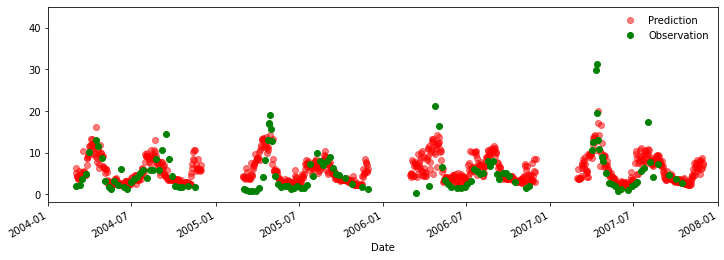

In [84]:
f,ax=plt.subplots(figsize=(12,4))
Pred.plot(style='ro',alpha=0.5,ax=ax)
df.plot(x='Date',y='Chl',style='go',ax=ax)
ax.set_xlim([pd.Timestamp(2004,1,1),pd.Timestamp(2008,1,1)])
ax.legend(['Prediction','Observation'],frameon=False)

### Load training dataset (for classification question)

In [98]:
# Make sure you are in the main folder('..\Machine_learning_workshop')
cd = os.getcwd()
print(cd)
while cd.split('\\')[-1]!='Machine_learning_workshop':
    os.chdir('..')
    cd=os.getcwd()
df=pd.read_csv('Classification dataset.csv',sep='\t',parse_dates=['Date'])

C:\Users\shuli278\Documents\D\PDF_Uppsala\7-Python code of ML algorithm\GitHub\Machine_learning_workshop


In [121]:
## Browse your dataset and create basic data visualizations
df.info()
## Turn the target 'Bloom' column into categorical data
df['Bloom']=pd.Categorical(df['Bloom'])
## Check the number of days counted as algal bloom date
df['Bloom'].value_counts()
## 0 represents no bloom
## 1 represents bloom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5999 non-null   datetime64[ns]
 1   SST       5999 non-null   float64       
 2   U         5999 non-null   float64       
 3   AirT      5999 non-null   float64       
 4   Humidity  5999 non-null   float64       
 5   CC        5999 non-null   float64       
 6   Prec      5999 non-null   float64       
 7   SWR       5999 non-null   float64       
 8   inflow    5999 non-null   float64       
 9   thermD    5999 non-null   float64       
 10  MLD       5999 non-null   float64       
 11  W         5999 non-null   float64       
 12  Bloom     5999 non-null   int64         
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 609.4 KB


0    5361
1     638
Name: Bloom, dtype: int64

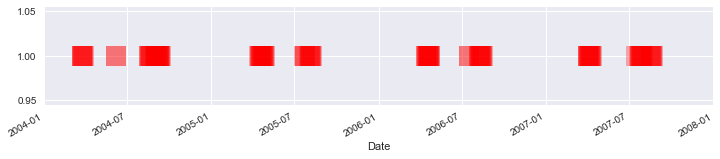

In [120]:
# Visualise the bloom dates
fig,ax=plt.subplots(figsize = (12,2))
df[df['Bloom']==1].plot(x='Date',y='Bloom',style='rs',markersize=20,alpha=0.3,ax=ax)
ax.set_xlim([pd.Timestamp(2004,1,1),pd.Timestamp(2008,1,1)])
ax.legend('')

## Start to built the RF classifier

In [123]:
# Choose the features and target, and make sure they are in the same length
X=df[['SST', 'U', 'AirT', 'Humidity', 'CC', 'Prec', 'SWR', 'inflow',
       'thermD', 'MLD', 'W']]
y=df[['Bloom']].values
print('Shape of feature dataframe: {}'.format(X.shape))
print('Length of target column {}'.format(len(y)))

Shape of feature dataframe: (5999, 11)
Length of target column 5999


In [ ]:
# Split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Shape of training dataset: {}'.format(X_train.shape))
print('Shape of testing dataset: {}'.format(X_test.shape))
## Since the classes in 'Bloom' are unbalanced, the class weight should be specified before training the model
RF_classifier=RandomForestClassifier(class_weight="balanced")
## When tuning the hyperparameters, the scoring method should be specified in terms of unbalanced classes
RSgrid = RandomizedSearchCV(estimator = RF_classifier,param_distributions = param_grid,
                            scoring='balanced_accuracy',n_iter = 10,cv = 10,verbose = 1,
                            random_state=101)

RSgrid.fit(X_train, y_train)
RF_classifier=RandomForestClassifier(class_weight="balanced").set_params(**RSgrid.best_params_)

In [134]:
## Train the model with the optimal hyperparameter combination
RF_classifier.fit(X_train, y_train)
print('R2 in training dataset: {}'.format(round(RF_classifier.score(X_train,y_train),2))) 
print('R2 in testing dataset: {}'.format(round(RF_classifier.score(X_test,y_test),2))) 

C:\Users\shuli278\AppData\Local\Temp/ipykernel_21000/3966326922.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_classifier.fit(X_train, y_train)


R2 in training dataset: 0.82
R2 in testing dataset: 0.79


In [144]:
## Additional function in RF classifier: it gives predict class probabilities
Prob=pd.DataFrame(RF_classifier.predict_proba(X_test),columns=[0,1])
Prob['Pred']=RF_classifier.predict(X_test)
Prob.head(30)

,0,1,Pred
0,0.746755,0.253245,0
1,0.979179,0.020821,0
2,0.804951,0.195049,0
3,0.791326,0.208674,0
4,0.586718,0.413282,0
5,0.669247,0.330753,0
6,0.529480,0.470520,0
7,0.516185,0.483815,0
8,0.502431,0.497569,0
9,0.982627,0.017373,0


# Practical Use
### Assume we only have data in 1999-2018 and want to predict the algal bloom date in 2019-2020 based on the available environmental factors

In [147]:
train_df=df[df['Date']<pd.Timestamp(2019,1,1)]
test_df=df[df['Date']>=pd.Timestamp(2019,1,1)]
X_train=train_df[['SST', 'U', 'AirT', 'Humidity', 'CC', 'Prec', 'SWR', 'inflow','thermD', 'MLD', 'W']]
y_train=train_df['Bloom']
RF_classifier=RandomForestClassifier(class_weight="balanced")
## When tuning the hyperparameters, the scoring method should be specified in terms of unbalanced classes
RSgrid = RandomizedSearchCV(estimator = RF_classifier,param_distributions = param_grid,
                            scoring='balanced_accuracy',n_iter = 10,cv = 10,verbose = 1,
                            random_state=101)

RSgrid.fit(X_train, y_train)
RF_classifier=RandomForestClassifier(class_weight="balanced").set_params(**RSgrid.best_params_)
RF_classifier.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=6,
                       n_estimators=200)

In [148]:
print('R2 in training dataset: {}'.format(round(RF_classifier.score(X_train,y_train),2))) 

R2 in training dataset: 0.74


In [170]:
X_test=test_df[['SST', 'U', 'AirT', 'Humidity', 'CC', 'Prec', 'SWR', 'inflow','thermD', 'MLD', 'W']]
Prob=pd.DataFrame(RF_classifier.predict_proba(X_test),columns=[0,1],index=test_df['Date'])
Prob['Pred']=RF_classifier.predict(X_test)
Prob['True']=test_df['Bloom'].values
Prob['True']=Prob['True'].astype('int64')

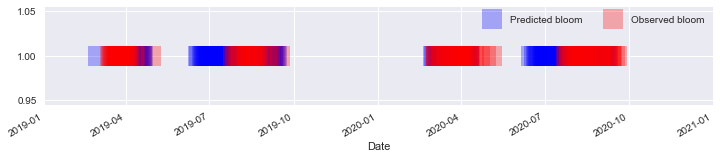

In [176]:
fig,ax=plt.subplots(figsize = (12,2))
Prob[Prob['Pred']==1].plot(y='Pred',style='bs',markersize=20,alpha=0.3,ax=ax,label='Predicted bloom')
Prob[Prob['True']==1].plot(y='True',style='rs',markersize=20,alpha=0.3,ax=ax,label='Observed bloom')
ax.set_xlim([pd.Timestamp(2019,1,1),pd.Timestamp(2021,1,1)])
ax.legend(ncol=2,frameon=False)